Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Para complementar el analisis, proponemos investigar un poco el uso de la telefonia movil propiamente dicha, como el envio de SMS y llamadas a lo largo de los años.

Para esto importamos el siguiente archivo .xlsx, el cual incluye las siguientes hojas de calculo:

- SMS: contiene informacion acerca de la cantidad de SMS enviados segun el año y el trimestre.
- Llamadas salientes: contiene informacion acerca de la cantidad de llamadas salientes segun el año y el trimestre.
- Minutos salientes: contiene informacion acerca de la cantidad de minutos que se realizaron de llamadas telefonicas segun el año y el trimestre.
- Ingresos: contiene informacion acerca de los ingresos en miles de $ segun el año y el trimestre.
- Penetracion: contiene informacion acerca de la cantidad de accesos a un telefono movil por cada 100 habitantes por año y trimestre.
- Accesos: contiene informacion acerca de la cantidad total de accesos a telefonos tanto prepagos como pospagos por año y trimestre.
- Hoja1: contiene informacion que no entendemos, por lo que decidimos descartar. 

!! Al igual que en el analisis anterior sobre los datos principales, decidimos no incluir la hoja de ingresos ya que no representa datos de valor para un analisis en pesos argentinos. 

In [3]:
df_sms = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='SMS')
df_llamadas = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='Llamadas salientes')
df_minutos = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='Minutos salientes')
df_ingresos = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='Ingresos')
df_penetracion = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='Penetracion')
df_accesos = pd.read_excel('./Sources/Telefonia_movil.xlsx', sheet_name='Accesos')

# SMS

Comenzamos analizando el DataFrame de SMS

In [5]:
df_sms.head()

,Año,Trimestre,Número de SMS salientes,Periodo
0,2013,1,36430004057,Ene-Mar 2013
1,2013,2,34255065773,Abr-Jun 2013
2,2013,3,33217669903,Jul-Sept 2013
3,2013,4,22547130953,Oct-Dic 2013
4,2014,1,18393198881,Ene-Mar 2013


En primer lugar, eliminamos la columna 'Periodo' ya que nos agrega informacion redundante.

In [6]:
df_sms = df_sms.drop(columns=['Periodo'], axis=1)

## EDA

Analizamos los valores nulos o faltantes

In [7]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Número de SMS salientes  40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


Analizamos si hay registros duplicados

In [9]:
df_sms.duplicated().sum()

0

Analizamos los valores atipicos o outliers

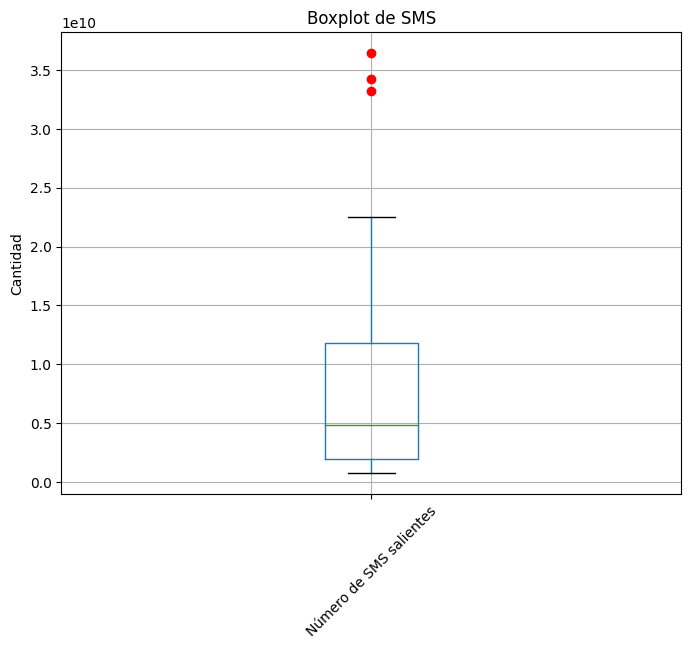

In [11]:
plt.figure(figsize=(8,6))
df_sms.boxplot(column=['Número de SMS salientes'], sym='ro')
plt.title('Boxplot de SMS')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

plt.show()

Buscamos esos registros

In [12]:
data = df_sms[['Número de SMS salientes']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_sms[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='Número de SMS salientes', ascending=False)
registros_con_outliers

,Año,Trimestre,Número de SMS salientes
0,2013,1,36430004057
1,2013,2,34255065773
2,2013,3,33217669903


Podemos ver que luego de un pico de mensajes de texto enviados durante los primeros trimestres del 2013, comenzaron a bajar abruptamente la cantidad. Interesante a comparar que paso con las conexiones a internet, ya que creemos que puede ser un factor importante.

Por otro lado, realizamos un grafico de linea para visualizar la fluctiacion a lo largo de los años en el numero de SMS salientes.

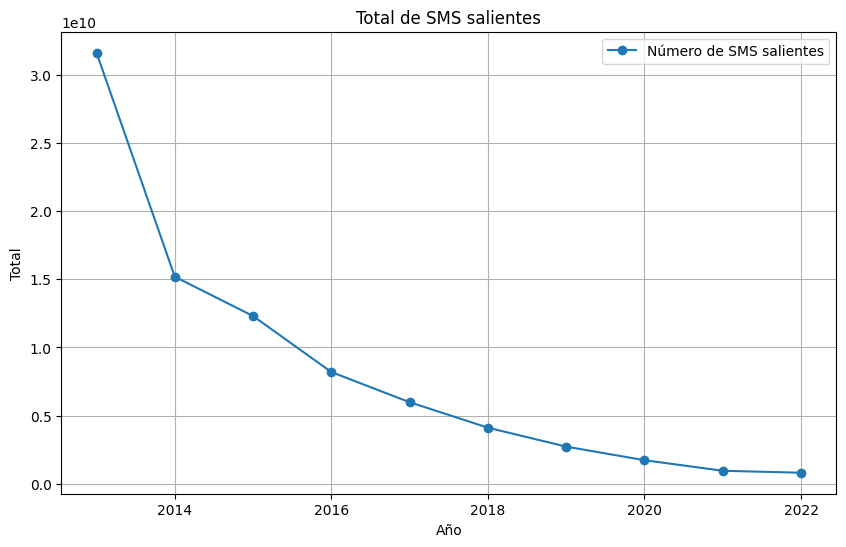

In [42]:
promedio_por_anio = df_sms.groupby('Año').agg({'Número de SMS salientes': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Número de SMS salientes'], label='Número de SMS salientes', marker='o')

plt.title('Total de SMS salientes')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

El gráfico revela una tendencia marcada de declive en la cantidad de SMS salientes a lo largo de los últimos años, con una caída significativa en la cantidad total de mensajes enviados. Esta disminución podría deberse en gran parte a la creciente popularidad de otras formas de comunicación, como las aplicaciones de mensajería instantánea y las redes sociales, que ofrecen alternativas más versátiles y económicas para la mensajería. La caída en la utilización de SMS también puede reflejar cambios en el comportamiento de los usuarios, con una preferencia cada vez mayor por la comunicación digital en lugar de los mensajes de texto tradicionales. Esta tendencia subraya la evolución constante de la tecnología y las preferencias de comunicación en la sociedad moderna

# Llamadas

In [13]:
df_llamadas.head()

,Año,Trimestre,Llamadas pospago salientes (miles),Llamadas prepago salientes (miles),Total de llamadas salientes (miles),Periodo
0,2013,1,3796547.0,3412766.0,7209313.0,Ene-Mar 2013
1,2013,2,4156872.0,3699387.0,7856258.0,Abr-Jun 2013
2,2013,3,4466727.0,3814925.0,8281653.0,Jul-Sept 2013
3,2013,4,4743791.0,3906876.0,8650667.0,Oct-Dic 2013
4,2014,1,4001399.0,3589181.0,7590580.0,Ene-Mar 2013


En primer lugar, eliminamos la columna 'Periodo' ya que nos agrega informacion redundante.

In [15]:
df_llamadas = df_llamadas.drop(columns=['Periodo'], axis=1)

## EDA

Comenzamos analizando los valores nulos o faltantes

In [16]:
df_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Año                                  40 non-null     int64  
 1   Trimestre                            40 non-null     int64  
 2   Llamadas pospago salientes (miles)   40 non-null     float64
 3   Llamadas prepago salientes (miles)   40 non-null     float64
 4   Total de llamadas salientes (miles)  40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


Analizamos si hay valores duplicados

In [17]:
df_llamadas.duplicated().sum()

0

Analizamos si hay valores atipicos o outliers

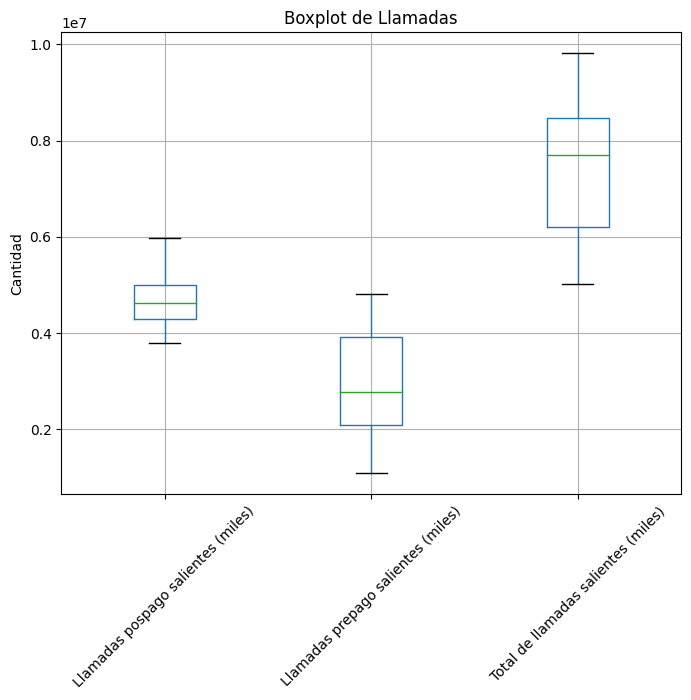

In [24]:
plt.figure(figsize=(8,6))
df_llamadas.boxplot(column=['Llamadas pospago salientes (miles)','Llamadas prepago salientes (miles)',	'Total de llamadas salientes (miles)'], sym='ro')
plt.title('Boxplot de Llamadas')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

plt.show()

Vemos que no se registran valores atipicos o outliers por lo que decidimos realizar un grafico de lineas para visualizar la tendencia a traves de los años.

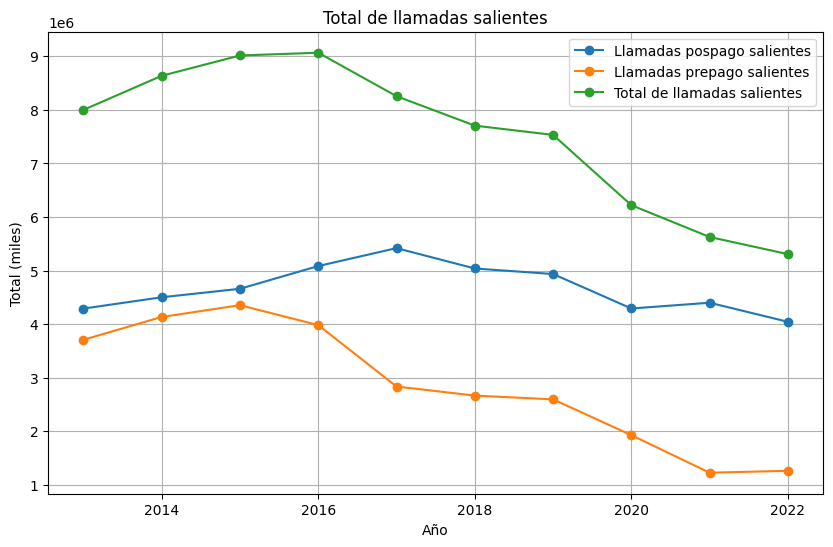

In [43]:
promedio_por_anio = df_llamadas.groupby('Año').agg({'Llamadas pospago salientes (miles)': 'mean','Llamadas prepago salientes (miles)': 'mean','Total de llamadas salientes (miles)': 'mean' })

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Llamadas pospago salientes (miles)'], label='Llamadas pospago salientes', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Llamadas prepago salientes (miles)'], label='Llamadas prepago salientes', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Total de llamadas salientes (miles)'], label='Total de llamadas salientes', marker='o')

plt.title('Total de llamadas salientes')
plt.xlabel('Año')
plt.ylabel('Total (miles)')
plt.legend()
plt.grid(True)
plt.show()

El gráfico ilustra una tendencia clara en la evolución de las llamadas salientes, donde las llamadas de modalidad prepaga han experimentado una disminución significativa a lo largo de los años, mientras que las llamadas pospagas han mantenido una relativa estabilidad. Esta tendencia podría indicar un cambio en la preferencia de los usuarios hacia planes de telefonía móvil pospagos, que ofrecen mayor flexibilidad y beneficios en términos de llamadas ilimitadas o paquetes de datos. Esta tendencia subraya la importancia de las opciones de telefonía móvil más flexibles y adaptables a las necesidades cambiantes de los usuarios en la era de la comunicación digital.

# Minutos

In [20]:
df_minutos.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943.0,6582117.0,15368060.0,Ene-Mar 2013
1,2013,2,9512689.0,7108640.0,16621329.0,Abr-Jun 2013
2,2013,3,10315484.0,7335154.0,17650638.0,Jul-Sept 2013
3,2013,4,9809515.0,6250549.0,16060064.0,Oct-Dic 2013
4,2014,1,10128751.0,5799223.0,15927974.0,Ene-Mar 2013


En primer lugar, eliminamos la columna 'Periodo' ya que nos agrega informacion redundante.

In [21]:
df_minutos = df_minutos.drop(columns=['Periodo'], axis=1)

## EDA

Analizamos los valores nulos o faltantes

In [22]:
df_minutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Año                                 40 non-null     int64  
 1   Trimestre                           40 non-null     int64  
 2   Minutos pospago salientes (miles)   40 non-null     float64
 3   Minutos prepago salientes (miles)   40 non-null     float64
 4   Total de minutos salientes (miles)  40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


Analizamos si hay registros duplicados

In [23]:
df_minutos.duplicated().sum()

0

Analizamos si hay registros atipicos o outliers

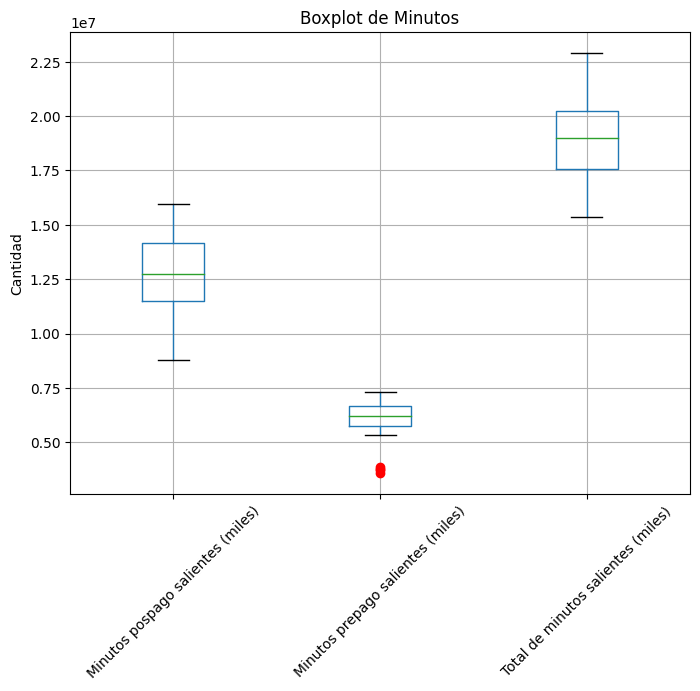

In [26]:
plt.figure(figsize=(8,6))
df_minutos.boxplot(column=['Minutos pospago salientes (miles)','Minutos prepago salientes (miles)','Total de minutos salientes (miles)'], sym='ro')
plt.title('Boxplot de Minutos')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

plt.show()

Encontramos que hay algunos valores atipicos en la columna 'Minutos prepago salientes (miles)' y nos disponemos a analizarlos.

In [28]:
data = df_minutos[['Minutos prepago salientes (miles)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_minutos[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='Minutos prepago salientes (miles)', ascending=True)
registros_con_outliers

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
36,2022,1,1.236290e+07,3586127.049,1.594903e+07
39,2022,4,1.220443e+07,3748217.662,1.595264e+07
37,2022,2,1.243652e+07,3776194.545,1.621272e+07
38,2022,3,1.257648e+07,3868160.545,1.644464e+07


Los registros de minutos prepagos salientes (miles) se ven muy por debajo del resto de los registros en el ultimo año, esto puede deberse a un monton de factores, como por ejemplo, un cambio en el comportamiento de los usuarios, una mayor adopcion de planes pospago, efectos de la pandemia, cambios en las tarifas, etc. 

Decidimos complementar este analisis con un grafico de lineas para ver la tendencia a lo largo de los años.

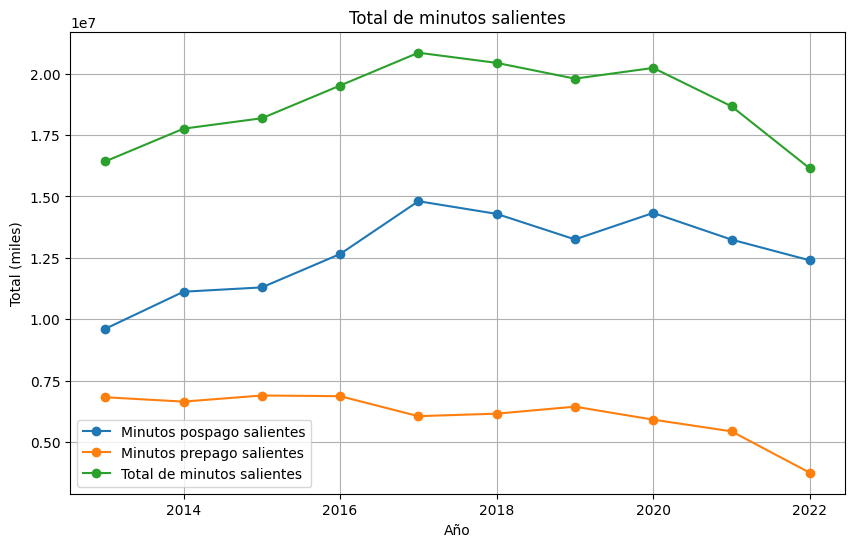

In [44]:
promedio_por_anio = df_minutos.groupby('Año').agg({'Minutos pospago salientes (miles)': 'mean','Minutos prepago salientes (miles)': 'mean','Total de minutos salientes (miles)': 'mean' })

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Minutos pospago salientes (miles)'], label='Minutos pospago salientes', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Minutos prepago salientes (miles)'], label='Minutos prepago salientes', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Total de minutos salientes (miles)'], label='Total de minutos salientes', marker='o')

plt.title('Total de minutos salientes')
plt.xlabel('Año')
plt.ylabel('Total (miles)')
plt.legend()
plt.grid(True)
plt.show()

El gráfico refleja una tendencia de relativa estabilidad en la cantidad de minutos de llamadas telefónicas realizadas tanto en modalidad prepaga como pospaga a lo largo del período analizado. Sin embargo, se destaca una marcada diferencia en la cantidad de minutos generados entre ambas modalidades. Esta disparidad podría estar relacionada con la flexibilidad y el uso típico de cada modalidad. Las llamadas pospagas, que a menudo incluyen planes con minutos ilimitados o tarifas planas, tienden a generar una mayor cantidad de minutos, ya que los usuarios se sienten menos restringidos por los costos por minuto. Por otro lado, las llamadas prepagas suelen ser utilizadas por aquellos que buscan un control estricto de sus gastos, lo que podría resultar en un menor número de minutos realizados.

# Penetracion

In [30]:
df_penetracion.head()

,Año,Trimestre,Accesos por cada 100 hab,Periodo
0,2013,1,154.37,Ene-Mar 2013
1,2013,2,156.00,Abr-Jun 2013
2,2013,3,158.59,Jul-Sept 2013
3,2013,4,159.37,Oct-Dic 2013
4,2014,1,148.07,Ene-Mar 2014


En primer lugar, eliminamos la columna 'Periodo' ya que nos agrega informacion redundante.

In [31]:
df_penetracion = df_penetracion.drop(columns=['Periodo'], axis=1)

## EDA

Comenzamos analizando si hay valores nulos o faltantes

In [32]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       40 non-null     int64  
 1   Trimestre                 40 non-null     int64  
 2   Accesos por cada 100 hab  40 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


Analizamos si hay registros duplicados

In [33]:
df_penetracion.duplicated().sum()

0

Analizamos si hay valores atipicos o outliers

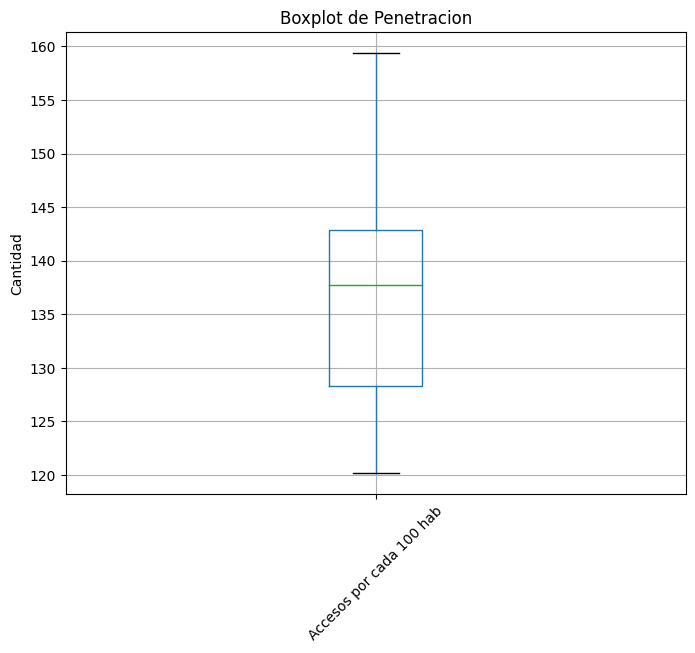

In [39]:
plt.figure(figsize=(8,6))
df_penetracion.boxplot(column=['Accesos por cada 100 hab'], sym='ro')
plt.title('Boxplot de Penetracion')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

plt.show()

No vemos que haya registros de outliers.

Decidimos complementar este analisis con un grafico de lineas para ver la tendencia a lo largo de los años.

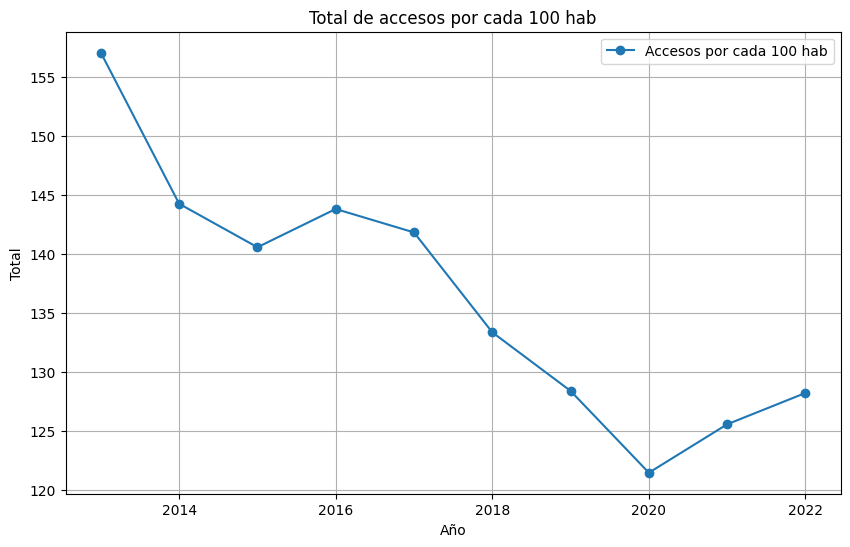

In [45]:
promedio_por_anio = df_penetracion.groupby('Año').agg({'Accesos por cada 100 hab': 'mean' })

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de accesos por cada 100 hab')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

El gráfico revela una tendencia notable de disminución en la cantidad de accesos a teléfonos móviles por cada 100 habitantes a lo largo del período analizado, con un punto mínimo alcanzado en 2020. Esta disminución podría estar relacionada con una variedad de factores, como la saturación del mercado de telefonía móvil, cambios en la demografía, la disponibilidad de dispositivos alternativos de comunicación, o incluso la influencia de eventos significativos, como la pandemia de COVID-19. El pico mínimo observado en 2020 podría estar relacionado con la incertidumbre y las restricciones asociadas con la pandemia, lo que podría haber influido en las decisiones de adquisición de teléfonos móviles. 

# Accesos

In [35]:
df_accesos.head()

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Periodo
0,2013,1,7761349.0,57147608.0,64908957,Ene-Mar 2013
1,2013,2,7769110.0,58004822.0,65773932,Abr-Jun 2013
2,2013,3,8002183.0,59048909.0,67051092,Jul-Sept 2013
3,2013,4,8674516.0,58894516.0,67569032,Oct-Dic 2013
4,2014,1,8224482.0,54725089.0,62949571,Ene-Mar 2013


En primer lugar, eliminamos la columna 'Periodo' ya que nos agrega informacion redundante.

In [36]:
df_accesos = df_accesos.drop(columns=['Periodo'], axis=1)

## EDA

Analizamos si hay registros nulos o faltantes

In [37]:
df_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Año                          40 non-null     int64  
 1   Trimestre                    40 non-null     int64  
 2   Total de accesos pospago     40 non-null     float64
 3   Total de accesos prepago     40 non-null     float64
 4   Total de accesos operativos  40 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.7 KB


Analizamos si hay registros duplicados

In [38]:
df_accesos.duplicated().sum()

0

Analizamos si hay valores atipicos o outliers

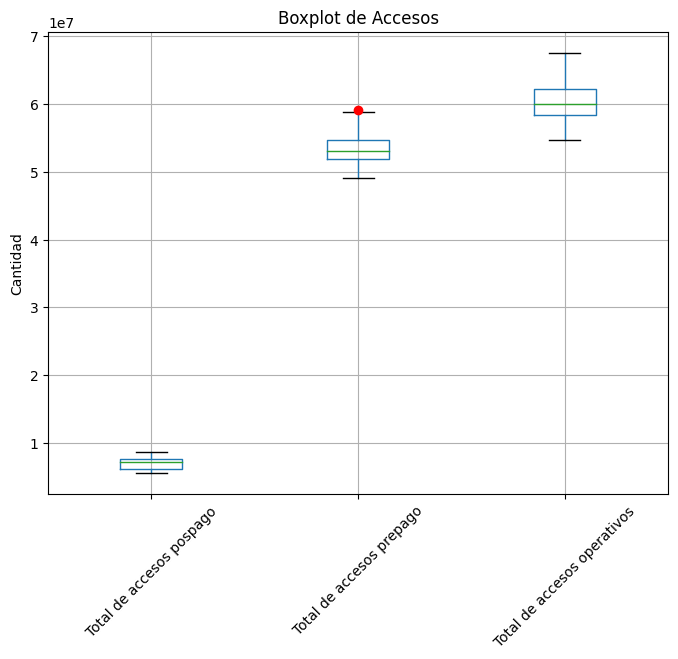

In [40]:
plt.figure(figsize=(8,6))
df_accesos.boxplot(column=['Total de accesos pospago',	'Total de accesos prepago',	'Total de accesos operativos'], sym='ro')
plt.title('Boxplot de Accesos')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

plt.show()

Encontramos un solo registro atipico en la columna 'Total de accesos prepago' por lo que decidimos analizarlo.

In [41]:
data = df_accesos[['Total de accesos prepago']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='Total de accesos prepago', ascending=False)
registros_con_outliers

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos
2,2013,3,8002183.0,59048909.0,67051092


Este valor por fuera del rango puede deberse a multiples factores, como por ejemplo, algun cambio en la regulacion de las telecomunicaciones, factores economicos o sociales que hayan influido en la demanda de los servicios de telefonia prepaga, algun evento significativo en la industria, etc. 

Decidimos complementar este analisis con un grafico de lineas para ver la tendencia a lo largo de los años.

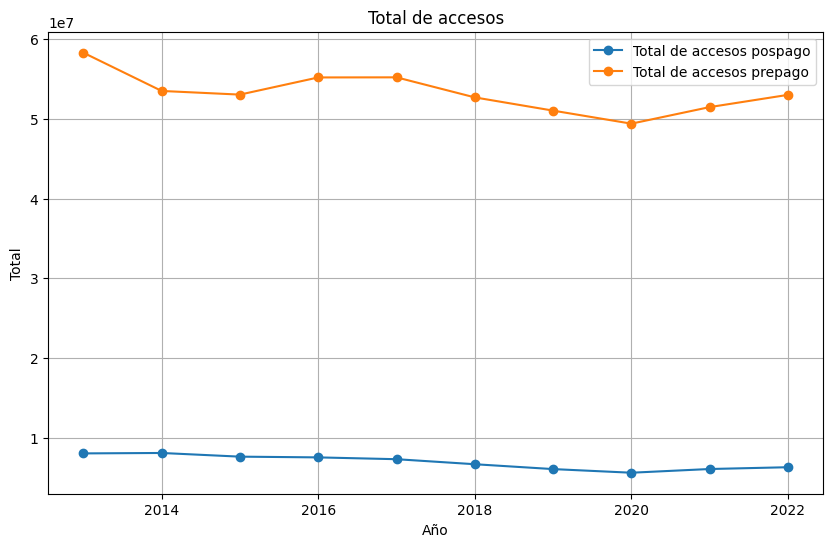

In [46]:
promedio_por_anio = df_accesos.groupby('Año').agg({'Total de accesos pospago': 'mean', 'Total de accesos prepago': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Total de accesos pospago'], label='Total de accesos pospago', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Total de accesos prepago'], label='Total de accesos prepago', marker='o')

plt.title('Total de accesos')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

El gráfico ilustra una tendencia estable en la cantidad de accesos de telefonía tanto pospaga como prepaga a lo largo del período analizado. Sin embargo, se destaca una diferencia significativa entre ambas modalidades, siendo la cantidad de accesos prepaga considerablemente mayor que la cantidad de accesos pospaga. Esta diferencia puede deberse a una serie de factores, como la flexibilidad y el control de gastos que ofrece la telefonía prepaga, que a menudo atrae a una amplia base de usuarios.

# Unimos todos los DataFrames

Para esto vamos a realizar un merge entre todos los dataframes, en base al año y trimestre.

In [59]:
datos_lista = [df_accesos, df_llamadas, df_minutos, df_penetracion, df_sms]

df_telefonia = datos_lista[0]

for df in datos_lista[1:]:
    df_telefonia = df_telefonia.merge(df, on=['Año', 'Trimestre'], how='inner')

df_telefonia.head()

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Llamadas pospago salientes (miles),Llamadas prepago salientes (miles),Total de llamadas salientes (miles),Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Accesos por cada 100 hab,Número de SMS salientes
0,2013,1,7761349.0,57147608.0,64908957,3796547.0,3412766.0,7209313.0,8785943.0,6582117.0,15368060.0,154.37,36430004057
1,2013,2,7769110.0,58004822.0,65773932,4156872.0,3699387.0,7856258.0,9512689.0,7108640.0,16621329.0,156.00,34255065773
2,2013,3,8002183.0,59048909.0,67051092,4466727.0,3814925.0,8281653.0,10315484.0,7335154.0,17650638.0,158.59,33217669903
3,2013,4,8674516.0,58894516.0,67569032,4743791.0,3906876.0,8650667.0,9809515.0,6250549.0,16060064.0,159.37,22547130953
4,2014,1,8224482.0,54725089.0,62949571,4001399.0,3589181.0,7590580.0,10128751.0,5799223.0,15927974.0,148.07,18393198881


In [60]:
df_telefonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Año                                  40 non-null     int64  
 1   Trimestre                            40 non-null     int64  
 2   Total de accesos pospago             40 non-null     float64
 3   Total de accesos prepago             40 non-null     float64
 4   Total de accesos operativos          40 non-null     int64  
 5   Llamadas pospago salientes (miles)   40 non-null     float64
 6   Llamadas prepago salientes (miles)   40 non-null     float64
 7   Total de llamadas salientes (miles)  40 non-null     float64
 8   Minutos pospago salientes (miles)    40 non-null     float64
 9   Minutos prepago salientes (miles)    40 non-null     float64
 10  Total de minutos salientes (miles)   40 non-null     float64
 11  Accesos por cada 100 hab          

Cambiamos el tipo de dato de algunas columnas para que sean numeros enteros y redondeamos a 2 decimales las que son con decimales. 

In [61]:
df_telefonia['Total de accesos pospago'] = df_telefonia['Total de accesos pospago'].astype(int)
df_telefonia['Total de accesos prepago'] = df_telefonia['Total de accesos prepago'].astype(int)
df_telefonia['Llamadas pospago salientes (miles)'] = df_telefonia['Llamadas pospago salientes (miles)'].astype(int)
df_telefonia['Llamadas prepago salientes (miles)'] = df_telefonia['Llamadas prepago salientes (miles)'].astype(int)
df_telefonia['Total de llamadas salientes (miles)'] = df_telefonia['Total de llamadas salientes (miles)'].astype(int)
df_telefonia['Minutos pospago salientes (miles)'] = df_telefonia['Minutos pospago salientes (miles)'].astype(int)
df_telefonia['Minutos prepago salientes (miles)'] = df_telefonia['Minutos prepago salientes (miles)'].astype(int)
df_telefonia['Total de minutos salientes (miles)'] = df_telefonia['Total de minutos salientes (miles)'].astype(int)

In [62]:
df_telefonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Año                                  40 non-null     int64  
 1   Trimestre                            40 non-null     int64  
 2   Total de accesos pospago             40 non-null     int32  
 3   Total de accesos prepago             40 non-null     int32  
 4   Total de accesos operativos          40 non-null     int64  
 5   Llamadas pospago salientes (miles)   40 non-null     int32  
 6   Llamadas prepago salientes (miles)   40 non-null     int32  
 7   Total de llamadas salientes (miles)  40 non-null     int32  
 8   Minutos pospago salientes (miles)    40 non-null     int32  
 9   Minutos prepago salientes (miles)    40 non-null     int32  
 10  Total de minutos salientes (miles)   40 non-null     int32  
 11  Accesos por cada 100 hab          

In [63]:
df_telefonia.head()

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Llamadas pospago salientes (miles),Llamadas prepago salientes (miles),Total de llamadas salientes (miles),Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Accesos por cada 100 hab,Número de SMS salientes
0,2013,1,7761349,57147608,64908957,3796547,3412766,7209313,8785943,6582117,15368060,154.37,36430004057
1,2013,2,7769110,58004822,65773932,4156872,3699387,7856258,9512689,7108640,16621329,156.00,34255065773
2,2013,3,8002183,59048909,67051092,4466727,3814925,8281653,10315484,7335154,17650638,158.59,33217669903
3,2013,4,8674516,58894516,67569032,4743791,3906876,8650667,9809515,6250549,16060064,159.37,22547130953
4,2014,1,8224482,54725089,62949571,4001399,3589181,7590580,10128751,5799223,15927974,148.07,18393198881


Descargamos el DataFrame en un CSV

In [64]:
df_telefonia.to_csv('telefonia.csv', index=False)

# Ingresos

In [4]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


Comenzamos eliminando la columna Periodo ya que es informacion redundante

In [5]:
df_ingresos = df_ingresos.drop(columns=['Periodo'], axis=1)

## EDA

Analizamos si tenemos datos nulos o vacios

In [6]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    40 non-null     int64
 1   Trimestre              40 non-null     int64
 2   Ingresos (miles de $)  40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


Analizamos si hay registros duplicados

In [7]:
df_ingresos.duplicated().sum()

0

Analizamos si hay valores atipicos o outliers

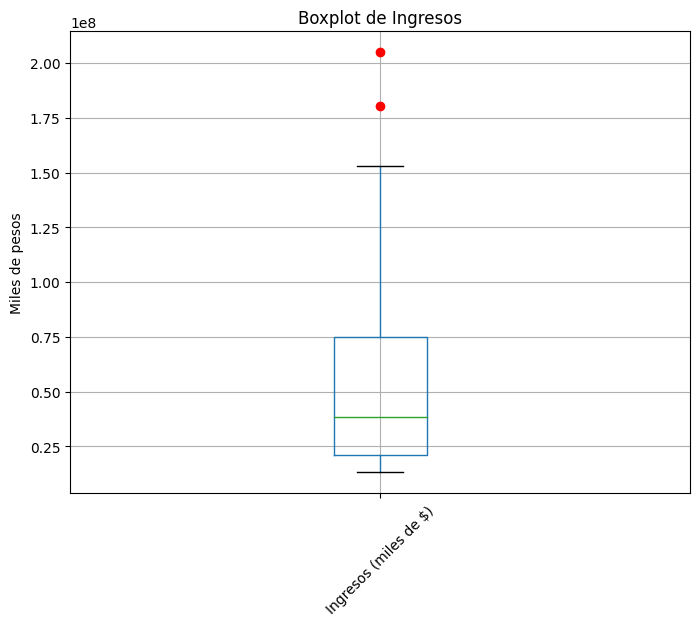

In [8]:
plt.figure(figsize=(8,6))
df_ingresos.boxplot(column=['Ingresos (miles de $)'], sym='ro')
plt.title('Boxplot de Ingresos')
plt.xticks(rotation=45)
plt.ylabel('Miles de pesos')

plt.show()

Encontramos algunos registros calificados como outliers por lo que decidimos analizarlos.

In [9]:
data = df_ingresos[['Ingresos (miles de $)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_ingresos[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='Ingresos (miles de $)', ascending=False)
registros_con_outliers

,Año,Trimestre,Ingresos (miles de $)
39,2022,4,204796575
38,2022,3,180356862


Vemos que los registros que figuran como outliers se refieren a los ultimos trimestres del año 2022. Esto puede deberse a diversos factores como por ejemplo, un aumento en la inflacion, un aumento en la demanda de internet, etc.

Al igual que en el DataFrame de ingresos en la industria del internet, este DataFrame no puede ser utilizado para realizar analisis de rendimiento del sector, ya que no representan valores constantes por ser valuados en pesos argentinos. Los factores externos, como la inflación, las fluctuaciones económicas y políticas, afectan significativamente el valor del peso argentino y, por lo tanto, pueden distorsionar el rendimiento real del sector de la telefonía móvil. Dado que estos factores pueden influir en gran medida en los ingresos, la falta de estabilidad y predictibilidad en los datos dificulta la interpretación precisa de las tendencias y el rendimiento del sector.

Sin embargo, planeo utilizar esta base de datos como forma comparativa con otra base de datos de ingresos del sector de Internet. La comparación entre ambas bases de datos podría proporcionar una valiosa perspectiva sobre la relación y las diferencias entre los sectores de telefonía móvil e Internet, permitiéndonos identificar tendencias y patrones significativos en ambas industrias. A pesar de las limitaciones de la base de datos de telefonía móvil, su uso en conjunto con otra fuente de datos puede enriquecer nuestro análisis y proporcionar una visión más completa de la dinámica de estos sectores.

In [10]:
df_ingresos.to_csv('ingresos_telefonia_movil.csv', index=False)